In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load the file
The merged data file is "merged_base_frame". The merging means the frame was inner joined at event_id for max displacement values as well as the base database values, so that maximum displacement values are attached at the event id to other earthquake properties.


In [3]:
filename = "merged_base_frame"

In [4]:
df = pd.read_pickle(filename)

In [5]:
df.head()

,event_id,quality,max_disp,longitude,latitude,depth,time,mag,mag_type,m_rr,...,m_tp,source_time_duration,source_time_function,gcmt_id,m_rr_norm,m_tt_norm,m_pp_norm,m_rt_norm,m_rp_norm,m_tp_norm
0,FGhXLK9X,2,3.652426e-06,-68.34,-21.62,141600.0,2020-01-14T01:57:32.800000Z,5.14,Mwc,-5.800000e+16,...,-3.670000e+16,1.8,triangle,C202001140157A,-1.000000,0.196552,0.803448,0.048448,-0.091034,-0.632759
1,ctpqppXn,4,9.426302e-07,-69.26,-19.61,123400.0,2020-08-03T11:56:54.100000Z,5.49,Mwc,-1.710000e+17,...,-1.720000e+16,2.8,triangle,C202008031156A,-0.909574,-0.092021,1.000000,0.109574,-0.590426,-0.091489
2,jfVYQZvW,4,6.177159e-07,-66.90,-24.20,218100.0,2007-04-18T01:08:15.600000Z,5.60,Mwc,-1.590000e+17,...,1.180000e+17,3.0,triangle,C200704180108A,-0.673729,-0.326695,1.000000,0.436441,-0.745763,0.500000
3,k5vKMzO1,5,3.011066e-06,-71.25,-19.84,33000.0,2014-03-24T11:32:19.900000Z,5.35,Mwc,1.090000e+17,...,1.640000e+16,2.4,triangle,C201403241132A,1.000000,-0.077982,-0.917431,0.155963,-0.744954,0.150459
4,m3eeDnSK,3,3.412404e-07,-70.71,-20.78,37900.0,2014-09-04T09:26:56.900000Z,5.01,Mwc,3.530000e+16,...,7.800000e+15,1.6,triangle,C201409040926A,0.980556,0.019722,-1.000000,0.257778,-0.511111,0.216667


In [2]:
#working_df = df["event_id", "quality"]

## Plot the values
First define a cutoff value for deep and shallow earthquakes.

In [6]:
cutoff_depth = 75 * 1000

In [7]:
df_shallow = df.query(f"depth < {cutoff_depth}")
df_deep = df.query(f"depth >= {cutoff_depth}")

In [8]:
x = df_shallow["mag"]
y = df_shallow["max_disp"]
x2 = df_deep["mag"]
y2 = df_deep["max_disp"]

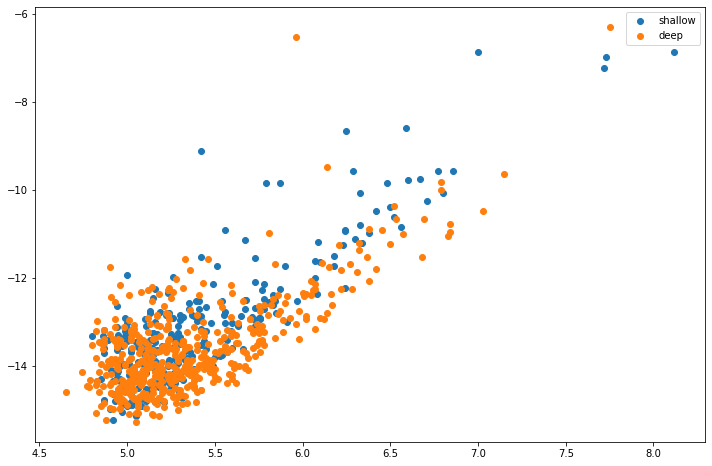

In [18]:
plt.figure(figsize=(12,8))

plt.scatter(x,np.log(y), label="shallow")
plt.scatter(x2,np.log(y2), label="deep")
plt.legend()
plt.show()

## Select only high quality events
High quality events are quality above 3.

In [10]:
high_quality_df = df[df["quality"] >= 3]

In [19]:
def plot_shallow_and_deep_events(dataframe):
    df_shallow = dataframe.query(f"depth < {cutoff_depth}")
    df_deep = dataframe.query(f"depth >= {cutoff_depth}")
    x = df_shallow["mag"]
    y = df_shallow["max_disp"]
    x2 = df_deep["mag"]
    y2 = df_deep["max_disp"]
    
    plt.figure(figsize=(12,8))

    plt.scatter(x,np.log(y), label="shallow")
    plt.scatter(x2,np.log(y2), label="deep")
    plt.legend()

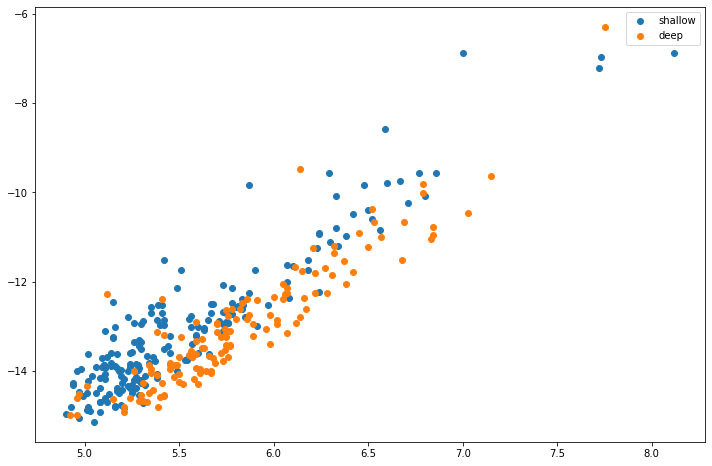

In [21]:
plot_shallow_and_deep_events(high_quality_df)